# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Hairul Yasin
- ID Dicoding: hairulysinn

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda pada setiap musim ?
- Bagaimana tren penggunaan bike sharing selama dua tahun terakhir?
- Apakah penggunaan sepeda lebih banyak dilakukan pada hari libur?
- Bagaimana pengaruh cuaca terhadap pengguna bike sharing?

## Menyiapkan semua library yang dibutuhkan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Tool Pengolahan Data:
*   Library `numpy` digunakan untuk komputasi numerik
*   Library `pandas` digunakan untuk memanipulasi dan menganalisis data

Tool Visualisasi Data:
*   Library `matplotlib` digunakan untuk membuat sebuah figure
*   Library `seaborn` digunakan untuk visualisasi data yang atraktif dan informatif.

## Data Wrangling

### Gathering Data

Membaca dataset `csv` file dari Github Repository menggunakan library `pandas`

#### tabel day_df

In [3]:
day_df = pd.read_csv("https://raw.githubusercontent.com/hairulysin/dicoding_DA/main/Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### tabel hour_df

In [4]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/hairulysin/dicoding_DA/main/Bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai tabel day_df

##### Cek informasi data (baris, column, dtype, missing value)


In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Pada tabel `day_df` terdapat kesalahan tipe data pada kolom `dteday` berupa `object` yang seharusnya `datetime`, serta tidak ditemukan missing value pada data

##### Cek duplikasi data

In [6]:
print("Jumlah duplikasi:", day_df.duplicated().sum())

Jumlah duplikasi: 0


##### Cek parameter statistik

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Lakukan hal yang sama pada tabel hour_df


In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


##### Cek duplikasi data

In [9]:
print("Jumlah duplikasi:", hour_df.duplicated().sum())

Jumlah duplikasi: 0


Berdasarkan hasil pengecekan pada tabel `hour_df` tidak terdapat duplikasi data

##### Cek parameter statistik

In [10]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

##### Memperbaiki tipe data

In [11]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

Mengubah dtypes kolom `dteday` menjadi `datetime` menggunakan `pandas`

In [12]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Explore day_df

In [13]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
66,67,2011-03-08,1,0,3,0,2,1,1,0.292500,0.302400,0.420833,0.120650,316,1817,2133
193,194,2011-07-13,3,0,7,0,3,1,1,0.746667,0.689404,0.631667,0.146133,748,3594,4342
435,436,2012-03-11,1,1,3,0,0,0,1,0.361739,0.359670,0.476957,0.222587,1658,3253,4911
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
660,661,2012-10-22,4,1,10,0,1,1,1,0.487500,0.482942,0.568333,0.081483,830,6228,7058


#### Denormalize

In [14]:
day_df["temp"] = day_df["temp"].multiply(41)
day_df["atemp"] = day_df["atemp"].multiply(50)
day_df["hum"] = day_df["hum"].multiply(100)
day_df["windspeed"] = day_df["windspeed"].multiply(67)

day_df.describe(include="all")

C:\Users\os\AppData\Local\Temp\ipykernel_16936\3202152416.py:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000


Mengembalikan data aslinya sebelum di normalisasi untuk di eksplore dan di visualisasi

In [15]:
day_df.loc[day_df["season"] == 1, "season"] = "Springer"
day_df.loc[day_df["season"] == 2, "season"] = "Summer"
day_df.loc[day_df["season"] == 3, "season"] = "Fall"
day_df.loc[day_df["season"] == 4, "season"] = "Winter"

day_df.season.value_counts().sort_index()

Fall        188
Springer    181
Summer      184
Winter      178
Name: season, dtype: int64

In [16]:
day_df.loc[day_df["yr"] == 0, "yr"] = "2011"
day_df.loc[day_df["yr"] == 1, "yr"] = "2012"

day_df.yr.value_counts().sort_index()

2011    365
2012    366
Name: yr, dtype: int64

In [17]:
day_df.loc[day_df["holiday"] == 0, "holiday"] = "Holiday"
day_df.loc[day_df["holiday"] == 1, "holiday"] = "Not a Holiday"

day_df.holiday.value_counts().sort_index()

Holiday          710
Not a Holiday     21
Name: holiday, dtype: int64

In [18]:
day_df.loc[day_df["weekday"] == 0, "weekday"] = "Sun"
day_df.loc[day_df["weekday"] == 1, "weekday"] = "Mon"
day_df.loc[day_df["weekday"] == 2, "weekday"] = "Tue"
day_df.loc[day_df["weekday"] == 3, "weekday"] = "Wed"
day_df.loc[day_df["weekday"] == 4, "weekday"] = "Thu"
day_df.loc[day_df["weekday"] == 5, "weekday"] = "Fri"
day_df.loc[day_df["weekday"] == 6, "weekday"] = "Sat"

day_df.weekday.value_counts().sort_index()

Fri    104
Mon    105
Sat    105
Sun    105
Thu    104
Tue    104
Wed    104
Name: weekday, dtype: int64

In [19]:
day_df.loc[day_df["workingday"] == 0, "workingday"] = "Holiday"
day_df.loc[day_df["workingday"] == 1, "workingday"] = "Working Day"

day_df.workingday.value_counts().sort_index()

Holiday        231
Working Day    500
Name: workingday, dtype: int64

In [20]:
day_df.loc[day_df["weathersit"] == 1, "weathersit"] = "Clear"
day_df.loc[day_df["weathersit"] == 2, "weathersit"] = "Mist + Cloudy"
day_df.loc[day_df["weathersit"] == 3, "weathersit"] = "Light Snow"
day_df.loc[day_df["weathersit"] == 4, "weathersit"] = "Heavy Rain"

day_df.weathersit.value_counts().sort_index()

Clear            463
Light Snow        21
Mist + Cloudy    247
Name: weathersit, dtype: int64

array([[<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'hum'}>,
        <AxesSubplot:title={'center':'windspeed'}>]], dtype=object)

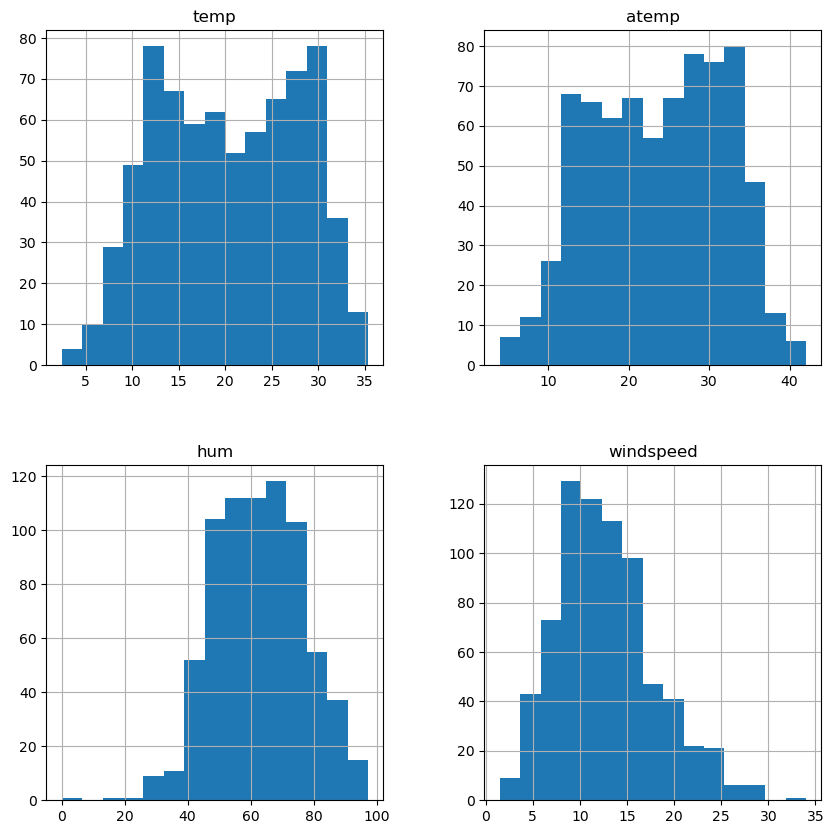

In [21]:
day_num_df = day_df[["temp", "atemp", "hum", "windspeed"]]
day_num_df.hist(bins=15, figsize=(10, 10))

Berdasarkan hasil pengamatan pada tabel `day_df` pada kolom `temp` bentuk grafik historgramnya adalah left-skewed distribution, pada kolom `atemp` bentuk grafik histogramnya adalah left-skewed distribution, pada kolom `hum` bentuk grafik histogramnya adalah right-skewed distribution, dan pada kolom `windspeed` bentuk grafik historgramnya adalah right-skewed distribution

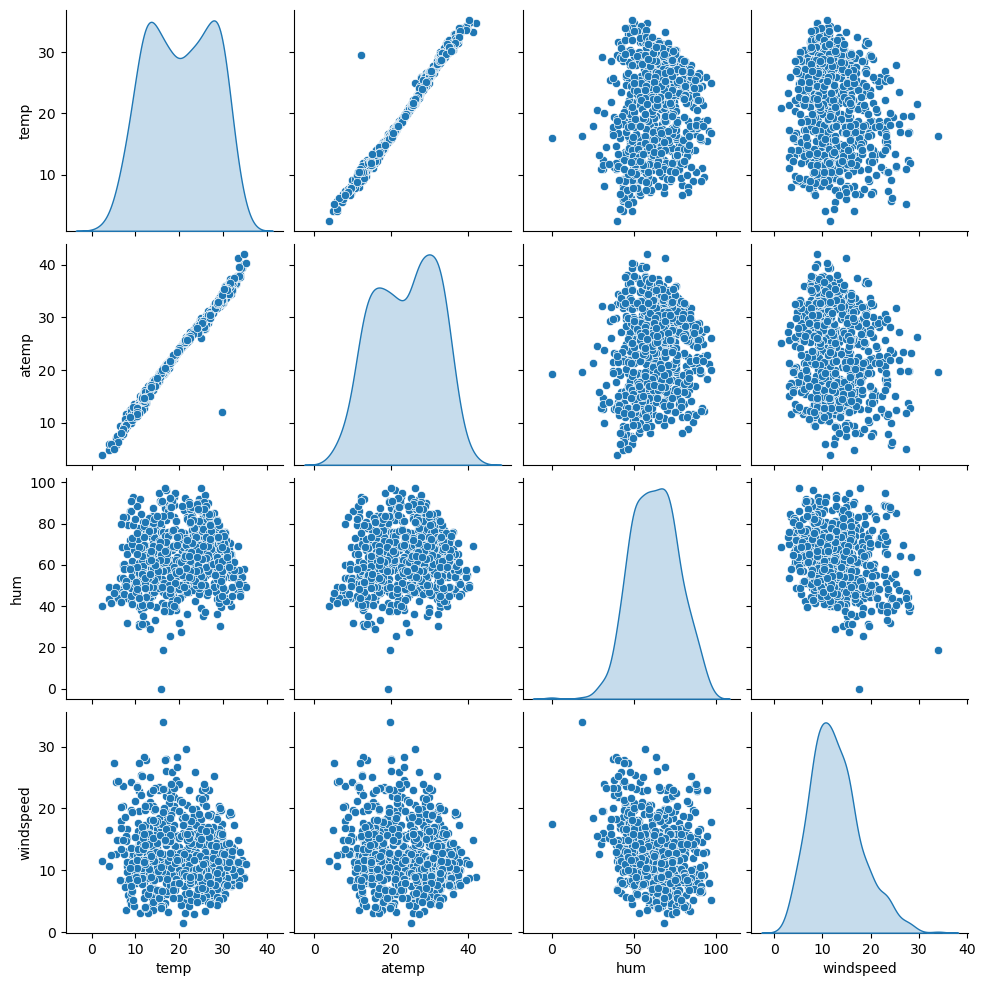

In [22]:
sns.pairplot(data=day_num_df, diag_kind="kde")

Berdasarkan hasil pengamatan pada tabel `day_df` pada kolom `temp` dan `atemp` memiliki korelasi sangat bersesuaian, pada kolom `temp` dan `hum` hampir tidak memiliki korelasi, pada kolom `temp` dan `windspeed` memiliki korelasi yang cukup berlawanan, pada kolom `atemp` dan `hum` hampir tidak memiliki korelasi, pada kolom `atemp` dan `windspeed` memiliki korelasi cukup berlawanan, pada kolom `hum` dan `windspeed` memiliki korelasi cukup berlawanan

### Explore hour_df

In [23]:
hour_df.hr.value_counts().sort_index()

0     726
1     724
2     715
3     697
4     697
5     717
6     725
7     727
8     727
9     727
10    727
11    727
12    728
13    729
14    729
15    729
16    730
17    730
18    728
19    728
20    728
21    728
22    728
23    728
Name: hr, dtype: int64

In [24]:
hour_df.loc[hour_df["weathersit"] == 1, "weathersit"] = "Clear"
hour_df.loc[hour_df["weathersit"] == 2, "weathersit"] = "Mist + Cloudy"
hour_df.loc[hour_df["weathersit"] == 3, "weathersit"] = "Light Snow"
hour_df.loc[hour_df["weathersit"] == 4, "weathersit"] = "Heavy Rain"

hour_df.weathersit.value_counts().sort_index()

Clear            11413
Heavy Rain           3
Light Snow        1419
Mist + Cloudy     4544
Name: weathersit, dtype: int64

## Visualization & Explanatory Analysis

### Bagaimana tren penggunaan sepeda pada setiap musim ?

In [25]:
byseason_df = day_df.groupby(by="season").agg({"cnt": "sum"}).reset_index()
byseason_df.rename(columns={"cnt": "total_users"}, inplace=True)
byseason_df

,season,total_users
0,Fall,1061129
1,Springer,471348
2,Summer,918589
3,Winter,841613


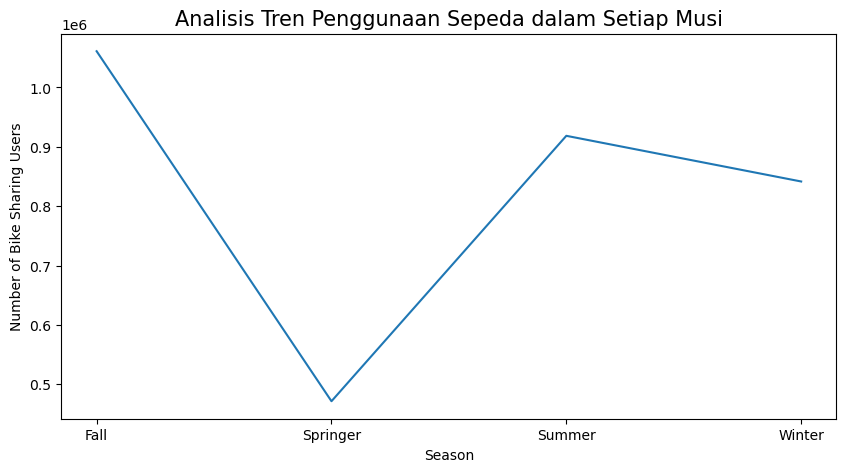

In [26]:
plt.figure(figsize=(10, 5))
sns.lineplot(
    x="season",
    y="total_users",
    data=byseason_df,
    sort=False
)
plt.title("Analisis Tren Penggunaan Sepeda dalam Setiap Musi", loc="center", fontsize=15)
plt.xlabel("Season")
plt.ylabel("Number of Bike Sharing Users")
plt.show()


### Bagaimana tren penggunaan bike sharing selama dua tahun terakhir?

In [27]:
# Menghitung total jumlah penggunaan bike sharing pada setiap tahun
byyr_df = day_df.groupby(by="yr").agg({"cnt": "sum"}).reset_index()
byyr_df

,yr,cnt
0,2011,1243103
1,2012,2049576


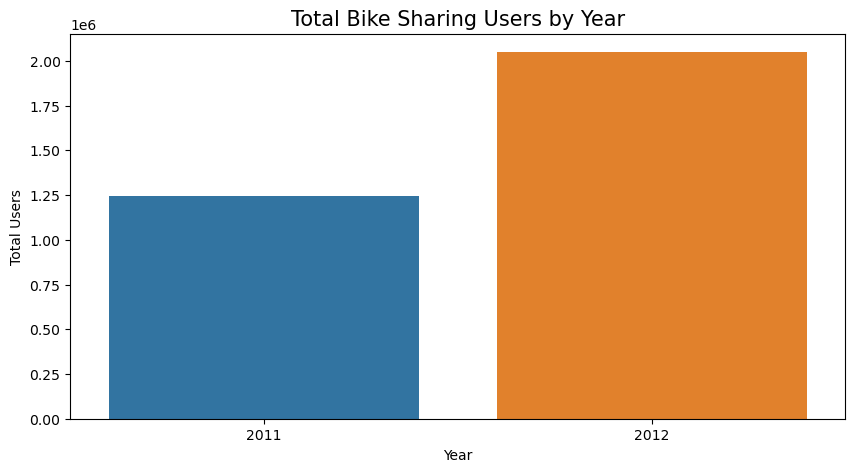

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(data=byyr_df, x='yr', y='cnt')
plt.title("Total Bike Sharing Users by Year", loc="center", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Total Users")
plt.show()


### Apakah penggunaan sepeda lebih banyak dilakukan pada hari libur atau saat bukan hari libur?

In [29]:
byholidyday_df = day_df.groupby(by="holiday").instant.nunique().reset_index()
byholidyday_df.rename(columns={
    "instant": "sum"
}, inplace=True)
byholidyday_df["holiday"].replace({0: "Not a Holiday", 1: "Holiday"}, inplace=True)
byholidyday_df

,holiday,sum
0,Holiday,710
1,Not a Holiday,21


C:\Users\os\AppData\Local\Temp\ipykernel_16936\1705558510.py:30: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  centre_circle = plt.Circle(


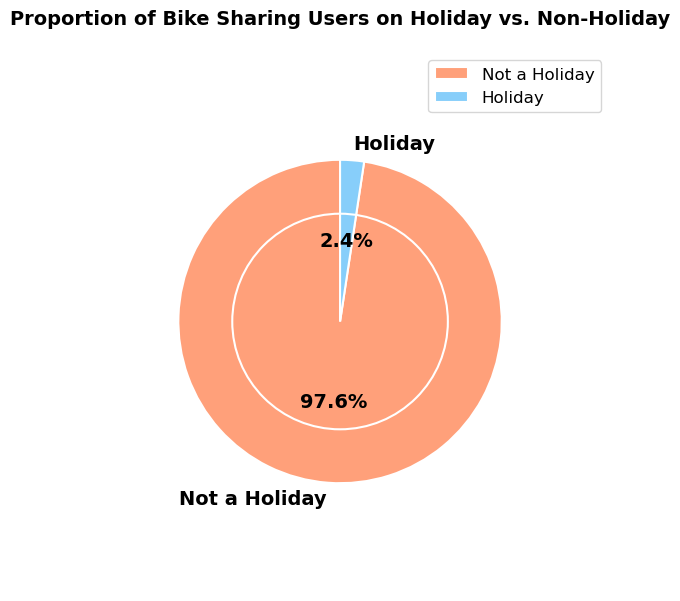

In [30]:
import matplotlib.pyplot as plt

# Mengelompokkan data berdasarkan jenis hari (libur atau tidak libur)
byholiday_df = day_df.groupby(by="holiday").agg({"cnt": "sum"}).reset_index()

# Menentukan ukuran gambar
plt.figure(figsize=(7, 7))


# Membuat pie chart
plt.pie(
    byholiday_df["cnt"],
    labels=["Not a Holiday", "Holiday"],
    colors=["#FFA07A", "#87CEFA"],
    startangle=90,
    autopct="%1.1f%%",
    textprops={
        "fontsize": 14,
        "fontweight": "bold",
    },
    wedgeprops={
        "linewidth": 1.5,
        "edgecolor": "white",
    },
    radius=0.75,
    pctdistance=0.5,
)

# Membuat donut chart
centre_circle = plt.Circle(
    (0, 0),
    0.5,
    color="white",
    edgecolor="black",
    linewidth=1.5,
    fill=False,
)

# Menambahkan lingkaran ke dalam pie chart
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Menambahkan judul dan keterangan sumbu
plt.title("Proportion of Bike Sharing Users on Holiday vs. Non-Holiday", fontsize=14, fontweight="bold", pad=20)
plt.legend(title="", loc="best", fontsize=12)

# Menampilkan gambar
plt.show()


### Bagaimana pengaruh cuaca terhadap pengguna bike sharing?

In [31]:
byweathersit_df = day_df.groupby(by="weathersit").instant.nunique().reset_index()
byweathersit_df.rename(columns={
    "instant": "sum"
}, inplace=True)
byweathersit_df

,weathersit,sum
0,Clear,463
1,Light Snow,21
2,Mist + Cloudy,247


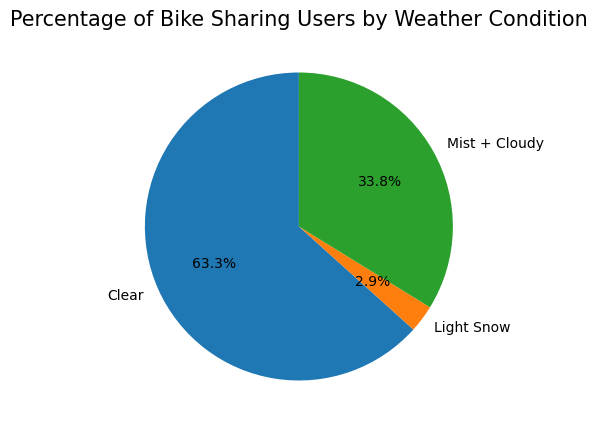

In [36]:
# Membuat pie chart untuk persentase penggunaan bike sharing berdasarkan kondisi cuaca
plt.figure(figsize=(10, 5))
plt.title("Percentage of Bike Sharing Users by Weather Condition", fontsize=15)
plt.pie(
    byweathersit_df["sum"],
    labels=byweathersit_df["weathersit"],
    autopct="%1.1f%%",
    startangle=90,
)
# plt.axis("equal")
plt.show()

## Insight yang diperoleh

Dari hasil analisis data yang dilakukan, didapatkan beberapa insight sebagai berikut:

1. Tren penggunaan sepeda cenderung meningkat pada musim yang lebih hangat seperti musim semi, musim panas, dan musim gugur, sedangkan penggunaan sepeda menurun pada musim dingin.

2. Tren penggunaan bike sharing mengalami peningkatan selama dua tahun terakhir, yaitu pada tahun 2012 jumlah pengguna lebih banyak dibandingkan dengan tahun 2011.

3. Penggunaan sepeda cenderung lebih banyak dilakukan pada hari-hari libur daripada pada hari biasa.

4. Cuaca juga memiliki pengaruh terhadap penggunaan bike sharing, dimana penggunaan bike sharing cenderung lebih tinggi pada hari-hari yang cerah dan kurang pada hari-hari yang berkabut atau bersalju.

Dengan demikian, para pemangku kepentingan dalam industri bike sharing dapat mempertimbangkan faktor-faktor tersebut dalam mengambil keputusan strategis terkait bisnis mereka, seperti menentukan lokasi penyediaan sepeda dan menentukan strategi promosi untuk meningkatkan penggunaan sepeda pada musim dingin dan pada hari kerja.

## Export Dataset

In [ ]:
day_df.to_csv("dashboard\clean_data.csv", index=False)